In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, ElasticNet, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, mean_squared_error, root_mean_squared_error

import pickle

In [94]:
def save_model(model, filename):
    # save model
    pickle.dump(model, open("Models/" + filename, "wb"))
    
def load_model(filename):
    # load model
    loaded_model = pickle.load(open("Models/" + filename, "rb"))

In [124]:
house_price_df = pd.read_csv('Datasets/house_price.csv', sep=";")
print(house_price_df.info())
print("house_price_df.isna().sum()")
print(house_price_df.isna().sum())
house_price_df = house_price_df.dropna()


house_price_df = house_price_df.drop("Id", axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None
house_price_df.isna().sum()
Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
Year

In [118]:
print(house_price_df.head())
print(house_price_df.info())
house_price_df.isna().sum()

   MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0          60       RL     8450    Inside     1Fam            5       2003   
1          20       RL     9600       FR2     1Fam            8       1976   
2          60       RL    11250    Inside     1Fam            5       2001   
3          70       RL     9550    Corner     1Fam            5       1915   
4          60       RL    14260       FR2     1Fam            5       2000   

   YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0          2003     VinylSd         0.0        856.0   208500.0  
1          1976     MetalSd         0.0       1262.0   181500.0  
2          2002     VinylSd         0.0        920.0   223500.0  
3          1970     Wd Sdng         0.0        756.0   140000.0  
4          2000     VinylSd         0.0       1145.0   250000.0  
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

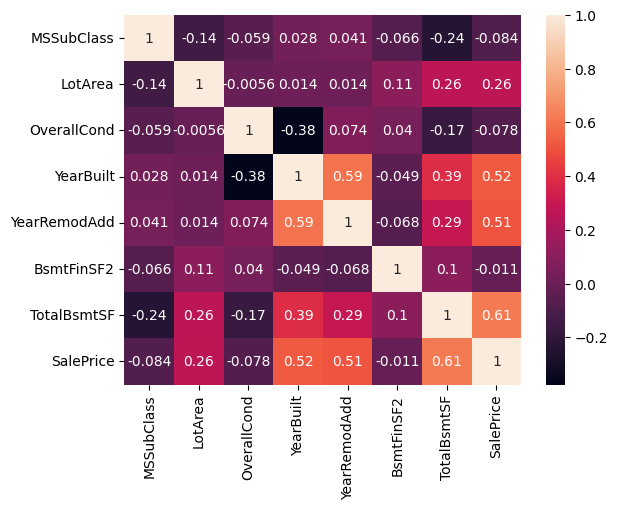

In [117]:


corr = house_price_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()






In [126]:
house_price_dummies = pd.get_dummies(house_price_df).astype('float32')

X = house_price_dummies.drop("SalePrice", axis=1).values
y = house_price_dummies["SalePrice"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, shuffle=True)

print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [98]:
lin_steps = [('scaler', StandardScaler()),
         ('lin', LinearRegression())]

tree_steps = [('scaler', StandardScaler()),
         ('tree', DecisionTreeRegressor())]

elasticnet_steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

ridge_steps = [('scaler', StandardScaler()),
         ('ridge', Ridge())]

lasso_steps = [('scaler', StandardScaler()),
         ('lasso', Lasso())]

In [99]:
lin_pipe = Pipeline(lin_steps)
tree_pipe = Pipeline(tree_steps)
elasticnet_pipe = Pipeline(elasticnet_steps)
ridge_pipe = Pipeline(ridge_steps)
lasso_pipe = Pipeline(lasso_steps)

In [100]:
tree_params = {"tree__criterion": ["squared_error"],
               "tree__splitter" : ['best', 'random'],
               "tree__max_features" : ["sqrt", "log2"],
               "tree__ccp_alpha": np.linspace(0.001, 0.3, 50)
               }

elasticnet_params = {"elasticnet__alpha" : np.linspace(0.001, 0.5, 100),
                     "elasticnet__max_iter": [5000]
                     }

ridge_params = {"ridge__alpha": np.linspace(0.1, 0.5, 100),
                "ridge__max_iter": [5000],
                "ridge__solver" : ['saga']
                }

lasso_params = {"lasso__alpha": np.linspace(0.1, 0.5, 100),
                "lasso__max_iter": [5000],
                "lasso__tol": np.linspace(0.0001, 1.0, 50)
                }


In [101]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

lin_cv = GridSearchCV(lin_pipe, param_grid = {}, cv = kf)
tree_cv = GridSearchCV(tree_pipe, param_grid = tree_params, cv = kf)
elasticnet_cv = GridSearchCV(elasticnet_pipe, param_grid = elasticnet_params, cv = kf)
ridge_cv = GridSearchCV(ridge_pipe, param_grid = ridge_params, cv = kf)
lasso_cv = GridSearchCV(lasso_pipe, param_grid = lasso_params, cv = kf)

In [102]:
lin_cv.fit(X_train, y_train)
tree_cv.fit(X_train, y_train)
elasticnet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)





/home/peti/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+12, tolerance: 5.706e+08
  model = cd_fast.enet_coordinate_descent(
/home/peti/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+12, tolerance: 5.905e+08
  model = cd_fast.enet_coordinate_descent(
/home/peti/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.081e+

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1       , 0.1040404 , 0.10808081, 0.11212121, 0.11616162,
       0.12020202, 0.12424242, 0.12828283, 0.13232323, 0.13636364,
       0.14040404, 0.14444444, 0.14848485, 0.15252525, 0.15656566,
       0.16060606, 0.16464646...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [103]:
#save_model(lin_cv, "house_price_lin.pickle")
#save_model(tree_cv, "house_price_tree.pickle")
#save_model(elasticnet_cv, "house_price_elasticnet.pickle")
#save_model(ridge_cv, "house_price_ridge.pickle")
#save_model(lasso_cv, "house_price_lasso.pickle")

In [104]:
#lin_cv = load_model("house_price_lin.pickle")
#tree_cv = load_model("house_price_tree.pickle")
#elasticnet_cv = load_model("house_price_elasticnet.pickle")
#ridge_cv = load_model( "house_price_ridge.pickle")
#lasso_cv = load_model( "house_price_lasso.pickle")

In [105]:
lin_predictions = lin_cv.predict(X_test)
tree_predictions = tree_cv.predict(X_test)
elasticnet_predictions = elasticnet_cv.predict(X_test)
ridge_predictions = ridge_cv.predict(X_test)
lasso_predictions = lasso_cv.predict(X_test)

In [106]:
lin_mse = print(mean_squared_error(y_test, lin_predictions))
tree_mse = print(mean_squared_error(y_test, tree_predictions))
elasticnet_mse = print(mean_squared_error(y_test, elasticnet_predictions))
ridge_mse = print(mean_squared_error(y_test, ridge_predictions))
lasso_mse = print(mean_squared_error(y_test, lasso_predictions))

3.3507572e+16
2559878736.6415524
2602193200.0
2264501200.0
2263545300.0


In [115]:
print(elasticnet_cv.best_params_)
print(elasticnet_cv.best_score_)

{'elasticnet__alpha': 0.494959595959596, 'elasticnet__max_iter': 5000}
0.5052836164783135


In [134]:

lin_var = lin_cv.score(X_test, y_test)
tree_var = tree_cv.score(X_test, y_test)
elasticnet_var = elasticnet_cv.score(X_test, y_test)
ridge_var = ridge_cv.score(X_test, y_test)
lasso_var  = lasso_cv.score(X_test, y_test)

In [152]:
print("lin_var Predictions: {}, Actual Values: {}".format(lin_predictions[:2], y_test[:2]))
print("tree_var Predictions: {}, Actual Values: {}".format(tree_predictions[:2], y_test[:2]))
print("elasticnet_var Predictions: {}, Actual Values: {}".format(elasticnet_predictions[:2], y_test[:2]))
print("ridge Predictions: {}, Actual Values: {}".format(ridge_predictions[:2], y_test[:2]))
print("lasso_var Predictions: {}, Actual Values: {}".format(lasso_predictions[:2], y_test[:2]))

res = dict(zip(lasso_predictions, y_test))

lasso_pred_y_dict = pd.DataFrame(res.items(), columns=['prediction', 'real']).astype(int)

data = {
        "prediction" : ["tree", "elastic", "ridge", "lasso"],
        "score" : [tree_var, elasticnet_var, ridge_var, lasso_var]
        }

print(lasso_pred_y_dict.sample(10))

lin_var Predictions: [170597.42 278805.44], Actual Values: [127500. 324000.]
tree_var Predictions: [139000. 402000.], Actual Values: [127500. 324000.]
elasticnet_var Predictions: [160527.27 260694.36], Actual Values: [127500. 324000.]
ridge Predictions: [166215.92 272099.6 ], Actual Values: [127500. 324000.]
lasso_var Predictions: [166248.11 272109.4 ], Actual Values: [127500. 324000.]
     prediction    real
227      162990  180000
273      155920  157000
9        258732  260000
205      220688  179000
60       138627  126500
368      265879  350000
204      111187  151000
319      271691  320000
342      232781  226000
63       141004  172000


<Axes: xlabel='prediction', ylabel='score'>

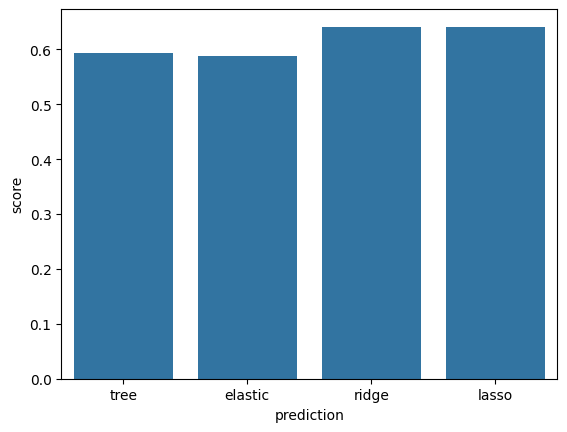

In [140]:
sns.barplot(data=data, x="prediction", y="score")